In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

### Preprocessing

In [2]:
# Load data
file_path = Path("Resources/loans_data_encoded.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,age,bad,month_num,gender_female,gender_male,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,0,6,0,1,0,1,0,0
1,1000,30,50,0,7,1,0,1,0,0,0
2,1000,30,33,0,8,1,0,1,0,0,0
3,1000,15,27,0,9,0,1,0,0,0,1
4,1000,30,28,0,10,1,0,0,0,0,1


In [3]:
# Define features set
X = loans_df.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,gender_female,gender_male,education_Bachelor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,6,0,1,0,1,0,0
1,1000,30,50,7,1,0,1,0,0,0
2,1000,30,33,8,1,0,1,0,0,0
3,1000,15,27,9,0,1,0,0,0,1
4,1000,30,28,10,1,0,0,0,0,1


In [4]:
# Define target vector
y = loans_df["bad"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Choose best learning rate

In [6]:
# Iterate over learning rate to identify the best classifier learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.619
Accuracy score (validation): 0.632

Learning rate:  0.1
Accuracy score (training): 0.661
Accuracy score (validation): 0.616

Learning rate:  0.25
Accuracy score (training): 0.712
Accuracy score (validation): 0.584

Learning rate:  0.5
Accuracy score (training): 0.768
Accuracy score (validation): 0.544

Learning rate:  0.75
Accuracy score (training): 0.805
Accuracy score (validation): 0.512

Learning rate:  1
Accuracy score (training): 0.797
Accuracy score (validation): 0.568



### Create Gradient Boosting Classifier

In [7]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,0,0
4,1,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,1


### Evaluate the model

In [8]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.512


In [9]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,48,36
Actual 1,25,16


In [10]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.57      0.61        84
           1       0.31      0.39      0.34        41

    accuracy                           0.51       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.54      0.51      0.52       125



### Visualize the decision tree

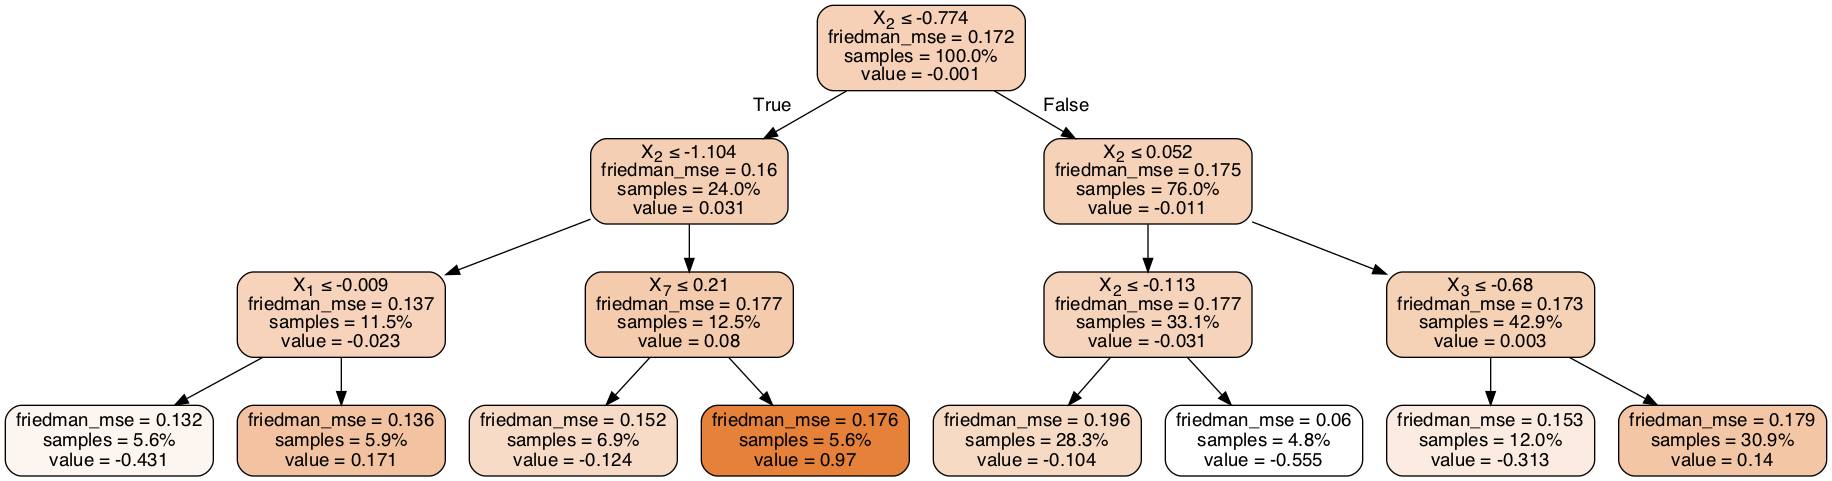

In [11]:
# Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())